# Regressão Linear Simples
### **Usar se é Significante a Correlação Linear Simples**

- É usada para encontrar uma reta que melhor define os dados

- Esta reta pode ser utilizada para prever dados de Y em função de X

em resumo ser pra isso acima, caso descobrir algo a mais adicione

In [36]:
import pandas as pd
from math import sqrt
import os
import seaborn as sns

csv_folder = "csvs/correlacao_linear_simples"
## CASO NÃO ESTEJA ENCONTRANDO OS ARQUIVOS, SÓ PEGA E DESCOMENTA A LINHA DEBAIXO PRA ELE PEGAR E TROCAR DE DIRETÓRIO
# os.chdir(f"../{csv_folder}")

# Primeira parte é achar o Coeficiente de Correlação

- list_x = Lista com os valores da variavel X
- list_y = Lista com os valores da variavel Y

- n = Quantidade de Pares de Dados (tamanho da lista)

- sum_of_x = Somatório dos valores da variavel X => $\sum_x$ 
- sum_of_y = Somatório dos valores da variavel Y => $\sum_y$ 

- sum_of_squared_x = Somatório dos valores ao quadrado da variavel X => $\sum_{x²}$ 
- sum_of_squared_y = Somatório dos valores ao quadrado da variavel Y => $\sum_{y²}$

- sum_of_xy = Somatório dos valores de X multiplicado por Y => $\sum_{x*y}$

- correlation_coeficient = coeficiente de Correlação => $\frac{\sum_{xy} - \frac{\sum_{x} * \sum{y}}{n}}{\sqrt{\sum{x^{2}} - \frac{(\sum{x})^{2}}{n}}  * \sqrt{\sum{y^{2}} - \frac{(\sum{y})^{2}}{n}}}$

In [31]:
print(os.listdir())
dataframe = pd.read_csv("altura_peso.csv")

['idade_assinaturas.csv', 'preco_procura.csv', 'custo_propaganda.csv', 'altura_peso.csv']


In [32]:
list_x = list(dataframe.items())[0][1]
list_y = list(dataframe.items())[1][1]

n = len(dataframe)
print(f"\nN = {n}")

sum_of_x = sum(list_x)
print(f"Somatório de X = {sum_of_x}")
sum_of_y = sum(list_y)
print(f"Somatório de Y = {sum_of_y}")

sum_of_squared_x = sum([*map(lambda x : x**2, list_x)])
print(f"Somatório de X ao quadrado = {sum_of_squared_x}")
sum_of_squared_y = sum([*map(lambda y : y**2, list_y)])
print(f"Somatório de Y ao quadrado = {sum_of_squared_y}")

sum_of_xy = 0

for i in range(n):
    sum_of_xy += list_x[i] * list_y[i]

print(f"Somatório de X e Y = {sum_of_xy}")

part1 = sum_of_xy - ((sum_of_x * sum_of_y)/n)
print(f"\npart1 = {part1}")

part2 = sqrt(sum_of_squared_x - ((sum_of_x**2)/n))
print(f"part2 = {part2}")

part3 = sqrt(sum_of_squared_y - ((sum_of_y**2)/n))
print(f"part3 = {part3}\n")


correlation_coeficient = part1 / (part2 * part3)

print(f"Coeficiente de Correlação é = {correlation_coeficient}")


N = 9
Somatório de X = 1567
Somatório de Y = 646
Somatório de X ao quadrado = 274021
Somatório de Y ao quadrado = 46764
Somatório de X e Y = 113103

part1 = 627.222222222219
part2 = 34.480268109295146
part3 = 19.888578520235043

Coeficiente de Correlação é = 0.9146334038085359


# Calculando a reta 

**Encheção de linguiça, mas explica oq vamos fazer**

O Método dos Mínimos Quadrados (MMQ), ou Mínimos Quadrados
Ordinários (MQO) é uma técnica de otimização matemática que procura
encontrar o melhor ajuste para um conjunto de dados tentando minimizar a
soma dos quadrados das diferenças entre o valor estimado e os dados
observados (tais diferenças são chamadas resíduos). É uma forma de
estimação amplamente utilizada. Consiste em um estimador que minimiza a
soma dos quadrados dos resíduos da regressão, de forma a maximizar o grau
de ajuste do modelo aos dados observados.


Variaveis a serem Utilizadas:

b = Coeficiente Angular, serve pra fazer a inclinação da linha pra definir o gráfico

a = Coeficiente Linear, onde a reta corta o Eixo Y, não se usa em nada alem de ajustar o Gráfico

R = Coeficiente de Correlação => Formula nas celulas acima

determination_coeficient = Coeficiente de Determinação => $(R)^{2} * 100$

Formula para Calcular o valor de Y para cada X, na reta => $Y = a + b.x$ 

In [33]:
b = ((n* sum_of_xy) - (sum_of_x * sum_of_y)) / ((n * sum_of_squared_x) - (sum_of_x ** 2))

print(f"Valor b é = {b}")

a = (sum_of_y / n) - (b * (sum_of_x/n))
print(f"Valor a é = {a}")

determination_coeficient = (correlation_coeficient ** 2) * 100
print(f"Valor do Coeficiente de Determinação = {determination_coeficient}\n")

print(f"ou seja, a equação de reta que melhor Representa o conjunto de dados, é: \n\nY = {round(a,2)} + {round(b,2)}*x \n")
print(f"e ela representa o conjunto de dados em {round(determination_coeficient, 2)}%")

Valor b é = 0.5275700934579439
Valor a é = -20.078037383177573
Valor do Coeficiente de Determinação = 83.65542633623882

ou seja, a equação de reta que melhor Representa o conjunto de dados, é: 

Y = -20.08 + 0.53*x 

e ela representa o conjunto de dados em 83.66%


# Mostrando a reta 


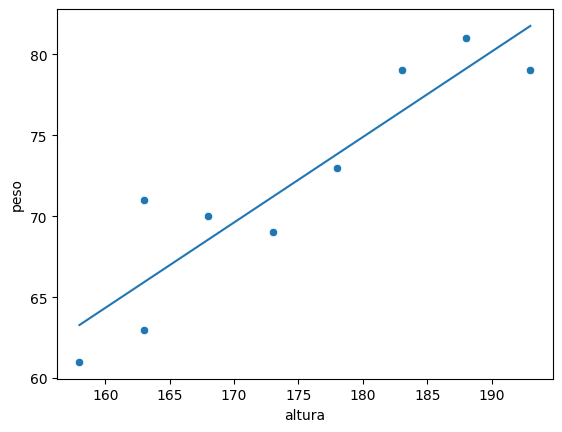

In [34]:
values_list_for_line = {}
for x in list_x:
    values_list_for_line[x] = (a+ b*x)

grafico = sns.scatterplot(data=dataframe, x=dataframe.columns[0],y=dataframe.columns[1])
grafico = sns.lineplot(data=values_list_for_line)